### 케라스로 구현한 로지스틱 회귀

In [ ]:
!pip install tensorflow

In [ ]:
from keras.models import Sequential # 케라스의 Sequential()을 임포트
from keras.layers import Dense      # 케라스의 Dense()를 임포트
from keras import optimizers        # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트
import matplotlib.pyplot as plt

X=np.array([1,2,3,4,5,6,7,8]) 
Y=np.array([0,0,0,0,1,1,1,1]) 

model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
RMSprop=optimizers.RMSprop(lr=0.01)
model.compile(optimizer=RMSprop ,loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X,Y, batch_size=1, epochs=200, shuffle=False)

plt.plot(X, Y, 'rx')
print(X)
print(model.predict(X))
plt.show()

In [ ]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        return z
    
    def fit(self, x, y, epochs=200):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                y_hat = self.activation(y_hat)
                err = y_hat - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.01*w_grad          # 가중치 업데이트
                self.b -= 0.01*b_grad          # 절편 업데이트

# x = np.array([1,2,3,4,5,6,7,8])
# y = np.array([0,0,0,0,1,1,1,1])
x = np.array([1,2,3,4,5,6,7,8,12])
y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

y_temp = []
for x_i in x:
    y_hat = neuron.forpass(x_i)
    if( y_hat >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(y_hat)

plt.plot(x,y_temp)
plt.show()

### 오즈비 그래프

In [ ]:
import numpy as np
probs = np.arange(0, 1, 0.01)
print(type(probs))
print(probs.ndim)
print(probs.shape)
print(probs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
probs = np.arange(0, 1, 0.01)
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

### 로짓 그래프

In [ ]:
probs  = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

### 시그모이드 그래프

In [ ]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

### 로지스틱 회귀 구현

In [ ]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        z = x * self.w + self.b       # 직선 방정식을 계산합니다
        return z
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
#         a = z;
        a = 1/(1+np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=200):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z)
                err = a - y_i       # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.01*w_grad          # 가중치 업데이트
                self.b -= 0.01*b_grad          # 절편 업데이트

# x = np.array([1,2,3,4,5,6,7,8])
# y = np.array([0,0,0,0,1,1,1,1])
x = np.array([1,2,3,4,5,6,7,8,30])
y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y, epochs=1000)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

for x_i in x:
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    if( a >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(a)

x = np.arange(0,x[-1],0.1)
y_temp = []
  
for i, x_i in enumerate(x):
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    y_temp.append(a)    
    
plt.plot(x,y_temp)
plt.show()

### 로그 그래프 

In [ ]:
# a = np.linspace(0, 10, 10)
# print(a)

b = np.arange(0,10,1)
print(b)

In [ ]:
zs = np.arange(0.01, 10., 0.01)
gs = [np.log(z) for z in zs]
# print(gs)
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(-5,0)
plt.xlabel('z')
plt.ylabel('(np.log(z)')
plt.show()

In [ ]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('(np.log(z)')
plt.show()

In [ ]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(1-z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('-(np.log(1-z)')
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

In [ ]:
print(cancer.data[:3].shape)  # (569,30)
print(cancer.data[:3])

In [ ]:
import matplotlib.pyplot as  plt
import numpy as np

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
cancer.feature_names

In [ ]:
cancer.feature_names[[3,23]]

In [ ]:
cancer.target

In [ ]:
np.unique(cancer.target, return_counts=True)

In [ ]:
x = cancer.data
print(x.shape)
y = cancer.target
print(y.ndim)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape)

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
np.unique(y_test, return_counts=True)

In [ ]:
x = np.arange(455*30).reshape(455,30)
print(x.shape)
w = np.ones(x.shape[1])
print(w.shape)
print(w)

In [ ]:
x = np.arange(455*30).reshape(455,30)
y = np.arange(455)
print(x.shape)
print(y.shape)
for x_i, y_i in zip(x,y):
    print(x_i.shape)
    print(y_i.shape)
    print(x_i)
    break

In [ ]:
a = [1,2,3,4,5]
b = [6,7,8,9,10]
for i,j in zip(a,b):
    print(i,j)

In [ ]:
x = np.array([1,2,3,4,5])
w = np.array([2,2,2,2,2])
x*w   # 아다마르의 곱
sum(x*w)+10

In [ ]:
x = np.arange(30)
w = np.arange(30)
b = 10
x*w   # 아다마르의 곱
np.sum(x*w) + b

In [ ]:
z = np.arange(30)
print(z)
z = np.clip(z, 10, 20)
print(z)

In [ ]:
z = 1000
a = np.exp(z)
print(a)

In [ ]:
z = -1000
z = np.clip(z, -100, 0)
print(z)
a = np.exp(-z)
print(a)

In [ ]:
x = np.array([1,2,3,4])
err = 0
w_grad = x*err  # [1,2,3,4]*[0,0,0,0] , broad cast 연산,  repeat 연산
print(w_grad)

In [ ]:
x = np.array([1,2,3,4])
err = -0.9
w_grad = x*err  # [1,2,3,4]*[-0.9,-0.9,-0.9,-0.9] , broad cast 연산,  repeat 연산
print(w_grad)

In [ ]:
a = np.arange(4)
print(a)
print(a.shape)

In [ ]:
a = np.arange(4).reshape(2,2)
print(a.shape)
print(len(a))
print(a.shape[0])
print(a[0].shape)
print(a[0])
print(a[1])

In [ ]:
class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):  # x.shape => (30,), self.w.shape => (30,)
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, lr=0.01): # x.shape (455,30)
#         print("x.shape=", x.shape)
        self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
#         print("self.w.shape=", self.w.shape) # self.w.shape (30,)
        self.b = 0                        # 절편을 초기화합니다.
        for i in range(epochs):           # epochs만큼 반복합니다
            for x_i, y_i in zip(x, y):    # (455,30) , (455,)   x_i = x[0] , y_i = y[0]
#                 print("x_i.shape=", x_i.shape)
                z = self.forpass(x_i)     # 정방향 계산 (30,)
#                 print("z=", z)
                a = self.activation(z)    # 활성화 함수 적용
#                 print("a=", a)
#                 print("y_i=",y_i)
                err = (a - y_i)           # (0.1 - 1 )
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
#                 print("w_grad=", w_grad)
                self.w -= lr*w_grad          # 가중치 업데이트
                self.b -= lr*b_grad          # 절편 업데이트
                
#                 if( err > 0 and err < 1 ):
#                 break
#             break
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a >= 0.5

In [ ]:
print(x_train.shape)

In [ ]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train) # (455,30) , (455,)

In [ ]:
print(neuron.predict(x_test))
print(y_test)

In [ ]:
print(neuron.predict(x_test) == y_test)

In [ ]:
np.mean(neuron.predict(x_test) == y_test)

### 단일층 신경망 구현

In [ ]:
losses = []

for i in range(7):
    losses.append(i+1)

print(losses)

In [ ]:
np.random.permutation(10)

In [ ]:
a = [1,2,3,4,5]
print(a)

In [ ]:
a = np.array([1,2,3,4,5])
print(a.shape)
print(a)  # [1 2 3 4 5]
print(a[0])        # 인덱싱
print(a[0:2])      # 슬라이싱
print(a[[0,2,4]])  # 정수 리스트 인덱싱

In [ ]:
x = np.array([3,4,2,5,1,6,23,7])
print(x)
indexes = np.random.permutation(len(x))
print(indexes)
print(x[indexes])  # x[[4 6 3 5 1 0 2 7]]

In [ ]:
x = np.arange(20*10).reshape(20,10)
# print(x)
indexes = np.random.permutation(len(x))  # len(x) => x.shape[0]
print(indexes)
print(x[indexes])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    test_size=0.2, random_state=42)

class SingleLayer:
    
    def __init__(self, rand_flag=0):
        self.w = None
        self.b = None
        self.losses = []
        self.rand_flag = rand_flag

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            
            if( self.rand_flag == 1 ):
                indexes = np.random.permutation(len(x))
            else:
                indexes = np.arange(len(x))
                
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = a - y[i]                     # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad                   # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

layer1 = SingleLayer(rand_flag=0)
layer1.fit(x_train, y_train,60)
print(layer1.score(x_test, y_test))

layer2 = SingleLayer(rand_flag=1)
layer2.fit(x_train, y_train,60)
print(layer2.score(x_test, y_test))

In [ ]:
plt.plot(layer1.losses)
plt.plot(layer2.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 스케일 테스트

In [ ]:
import numpy as np
x_train = np.arange(100)
print(x_train)

train_mean = np.mean(x_train)
print(train_mean)
train_std = np.std(x_train)
print(train_std)
x_train_scaled = (x_train - train_mean) / train_std
print(x_train_scaled)
print(np.mean(x_train_scaled))
print(np.std(x_train_scaled))

In [ ]:
a = np.array([[1,2,3],
              [4,5,6]])

print(np.sum(a))        # 21
print(np.sum(a,axis=1)) # [6 15]
print(np.sum(a,axis=0)) # [5 7 9]

In [ ]:
import numpy as np
x_train = np.arange(10*2).reshape(10,2)
print(x_train)
x_train[:,1] *= 100
print(x_train)
train_mean = np.mean(x_train, axis=0)
print(train_mean)
train_std = np.std(x_train, axis=0)
print(train_std)
x_train_scaled = (x_train - train_mean) / train_std
print(x_train_scaled)
print(np.mean(x_train_scaled, axis=0))
print(np.std(x_train_scaled, axis=0))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                            test_size=0.2, random_state=42)
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
a = np.array([1,2,3,4,5])
print( np.sum(a) )

In [ ]:
a = np.arange(100,400,3)
print(a)
std = np.std(a)
print(std)
mean = np.mean(a)
print(mean)
z = (a - mean)/std
print(np.std(z))
print(np.mean(z)) #
print(z)

In [ ]:
a = np.array([[1,2,3],   # 6
              [4,5,6]])  # 15
print(a.shape)
print(np.sum(a))
print(np.sum(a, axis=0)) # 행끼리 더하라.  , 세로로 더하라
print(np.sum(a, axis=1)) # 열끼리 더하라.  , 가로로 더하라

In [ ]:
# x.shape => (455,30) 

a = np.array([[1,4000],
              [2,3000],
              [3,5000]])
print(a.shape)
print(a)
train_mean = np.mean(a, axis=0)
print(train_mean)
train_std = np.std(a, axis=0)
print(train_std)
a_scaled = (a - train_mean) / train_std
print(a_scaled)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, 
                                                            test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

In [82]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b    # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err          # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())       # 가중치를 기록합니다.
        np.random.seed(42)                         # 랜덤 시드를 지정합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다.
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = (a - y[i])                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                # 그래디언트에서 페널티 항의 미분 값을 더합니다
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.lr * w_grad         # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 가중치를 기록합니다.
                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y) + self.reg_loss())
            # 검증 세트에 대한 손실을 계산합니다
            self.update_val_loss(x_val, y_val)
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) >= 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
    
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])     # 정방향 계산
            a = self.activation(z)         # 활성화 함수 적용
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

In [ ]:
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

In [ ]:
w2 = []
w3 = []
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [ ]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

In [ ]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)

In [ ]:
w2 = []
w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [ ]:
layer2.score(x_val, y_val)

In [ ]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std

In [ ]:
layer2.score(x_val_scaled, y_val)

In [ ]:
x_val_scaled = (x_val - train_mean) / train_std

In [ ]:
layer2.score(x_val_scaled, y_val)

In [ ]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [ ]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

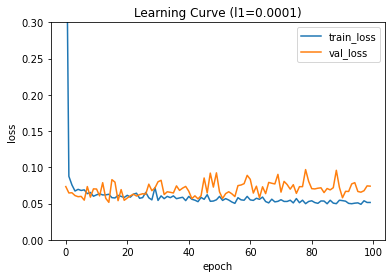

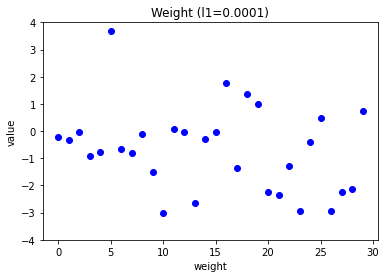

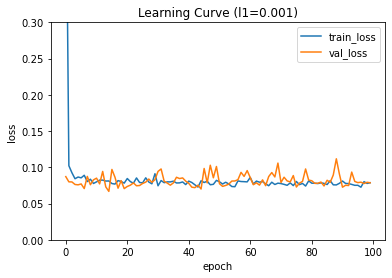

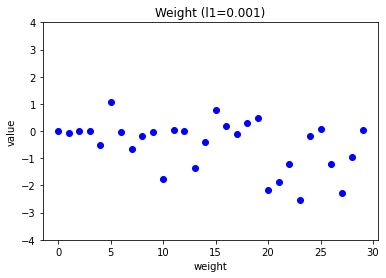

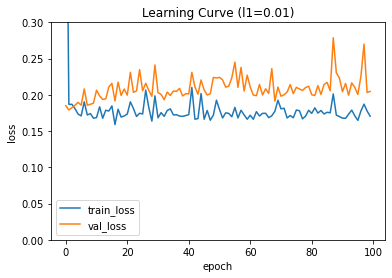

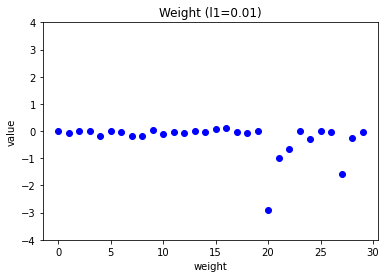

In [83]:
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
    lyr = SingleLayer(l1=l1)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l1={})'.format(l1))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l1={})'.format(l1))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

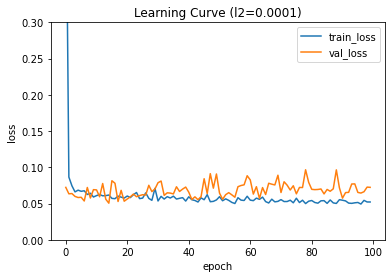

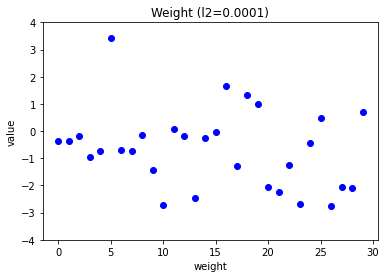

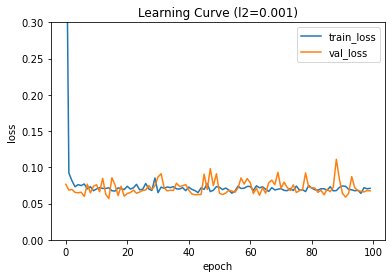

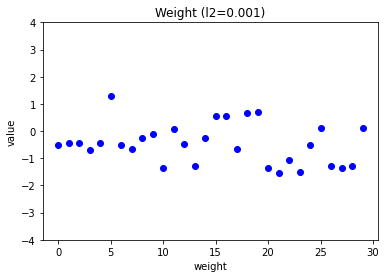

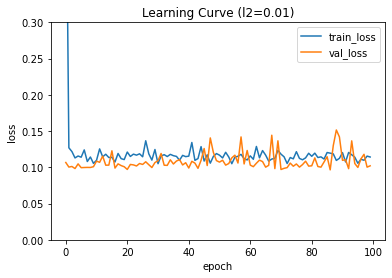

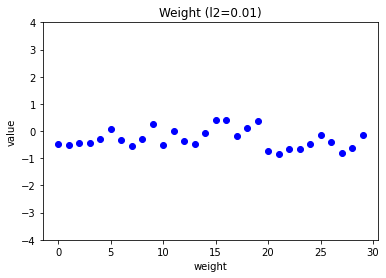

In [84]:
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
    lyr = SingleLayer(l2=l2)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l2={})'.format(l2))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l2={})'.format(l2))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

In [94]:
# a = np.array([1,2,3])
# b = np.array([4,5,6])
# print(a+b)

# a = [1,2,3]
# b = [4,5,6]
# print(a+b)

# print(range(10))
# for i in range(10):
#     print(i, end=" ")
    
# l1 = list(range(10))
# print(l1)

# a = 'hello '
# b = 'world'
# print(a+b)

array = np.array([10,20,30,40,50,60,70,80,90])
a= [0,1,2]
b= [6,7,8]
index = a+b
print(index)
print(array[index])  # a[ [0,1,2,6,7,8] ]

[0, 1, 2, 6, 7, 8]
[10 20 30 70 80 90]


In [99]:
a = np.arange(100,200)
print(a)
start=10
end = 20
val = a[start:end]
print(val)
index = list(range(0, start))+list(range(end, len(a)))
print(index)
# # # # b = list(a)
fold = a[np.array(index)]
print(fold)
# fold[0] = 999
# print(fold)
# print(a)



[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]
[110 111 112 113 114 115 116 117 118 119]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[100 101 102 103 104 105 106 107 108 109 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 1

In [100]:
print(x_train_all.shape)
validation_scores = []
k = 10
bins = len(x_train_all) // k

for i in range(k):
    start = i*bins
    end = (i+1)*bins
    val_fold = x_train_all[start:end]
    val_target = y_train_all[start:end]
    
    train_index = list(range(0, start))+list(range(end, len(x_train)))
    train_fold = x_train_all[train_index]
    train_target = y_train_all[train_index]
    train_mean = np.mean(train_fold, axis=0)
    train_std = np.std(train_fold, axis=0)
    train_fold_scaled = (train_fold - train_mean) / train_std
    val_fold_scaled = (val_fold - train_mean) / train_std
    
    lyr = SingleLayer(l2=0.01)
    lyr.fit(train_fold_scaled, train_target, epochs=50)
    score = lyr.score(val_fold_scaled, val_target)
    validation_scores.append(score)

print(np.mean(validation_scores))

(455, 30)
0.9711111111111113
